# Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy # The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more
import requests as rq
from config2 import weather_api_key
from datetime import datetime
import time

# Generate the latitudes and longitudes

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
# lat_lngs

# Unpack the zip object

Add the latitudes and longitudes to a list.

In [3]:
coordinates = list(lat_lngs)
# coordinates

# Generate Random World Cities

Identify the nearest city for each latitude and longitude combination.

In [4]:
# Create a list for holding the cities.
cities = []

# Loop through the coordinates and identify thr nearest cities for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

# Loop through the list of cities and build the city URL.

In [5]:
# Build the basic URL for the OpenWeatherMap with the weather_api_key.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city1_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

for i, city1 in enumerate(cities): 
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city1_url = url + "&q=" + city1 #.replace("", "+")
    # print(city1_url)
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city1}" )
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city1_weather = rq.get(city1_url).json()
        # Parse out the needed data.
        city1_lat = city1_weather["coord"]["lat"]
        city1_lng = city1_weather["coord"]["lon"]
        city1_max_temp = city1_weather["main"]["temp_max"]
        city1_humidity = city1_weather["main"]["humidity"]
        city1_clouds = city1_weather["clouds"]["all"]
        city1_wind = city1_weather["wind"]["speed"]
        city1_country = city1_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city1_date = datetime.utcfromtimestamp(city1_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city1_data.append({"City": city1.title(),
                          "Lat": city1_lat,
                          "Lng": city1_lng,
                          "Max Temp": city1_max_temp,
                          "Humidity": city1_humidity,
                          "Cloudiness": city1_clouds,
                          "Wind Speed": city1_wind,
                          "Country": city1_country,
                          "Date": city1_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mahebourg
Processing Record 2 of Set 1 | saint anthony
Processing Record 3 of Set 1 | chulym
Processing Record 4 of Set 1 | edson
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | tidore
City not found. Skipping...
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | broken hill
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | mehamn
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | thinadhoo
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | los llanos de aridane
Processing Record 22 of Set 1 | poum


Processing Record 41 of Set 4 | coos bay
Processing Record 42 of Set 4 | gimli
Processing Record 43 of Set 4 | tacna
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | nagar karnul
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | cidreira
Processing Record 48 of Set 4 | suluq
Processing Record 49 of Set 4 | palmer
Processing Record 50 of Set 4 | qandala
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | constitucion
Processing Record 3 of Set 5 | izumo
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | tutoia
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | solnechnyy
Processing Record 8 of Set 5 | yerofey pavlovich
Processing Record 9 of Set 5 | trairi
Processing Record 10 of Set 5 | sisimiut
Processing Record 11 of Set 5 | salalah
Processing Record 12 of Set 5 | omboue
Processing Record 13 of Set 5 | belyy yar
Processing Record 14 of Set 5 | t

Processing Record 32 of Set 8 | bengkulu
Processing Record 33 of Set 8 | jimenez
Processing Record 34 of Set 8 | vung tau
Processing Record 35 of Set 8 | itaituba
Processing Record 36 of Set 8 | singaraja
Processing Record 37 of Set 8 | petrovsk
Processing Record 38 of Set 8 | yanam
Processing Record 39 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 40 of Set 8 | senmonorom
City not found. Skipping...
Processing Record 41 of Set 8 | mahon
Processing Record 42 of Set 8 | padre bernardo
Processing Record 43 of Set 8 | ledyard
Processing Record 44 of Set 8 | lata
Processing Record 45 of Set 8 | anchorage
Processing Record 46 of Set 8 | sept-iles
Processing Record 47 of Set 8 | labuhan
Processing Record 48 of Set 8 | senneterre
Processing Record 49 of Set 8 | inhambane
Processing Record 50 of Set 8 | cao bang
Processing Record 1 of Set 9 | kamaishi
Processing Record 2 of Set 9 | guanica
Processing Record 3 of Set 9 | pangnirtung
Processing Record 4 of Set 9 | marana
Pr

Processing Record 17 of Set 12 | montrose
Processing Record 18 of Set 12 | esfarayen
Processing Record 19 of Set 12 | kjopsvik
Processing Record 20 of Set 12 | berdigestyakh
Processing Record 21 of Set 12 | gat
Processing Record 22 of Set 12 | soligalich
Processing Record 23 of Set 12 | duldurga
Processing Record 24 of Set 12 | cristalina
Processing Record 25 of Set 12 | yang talat
Processing Record 26 of Set 12 | mariental
Processing Record 27 of Set 12 | dobele
Processing Record 28 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 29 of Set 12 | novi bilokorovychi
Processing Record 30 of Set 12 | grande-riviere
City not found. Skipping...
Processing Record 31 of Set 12 | zyryanka
Processing Record 32 of Set 12 | cacoal
Processing Record 33 of Set 12 | cockburn town
Processing Record 34 of Set 12 | talara
Processing Record 35 of Set 12 | longford
Processing Record 36 of Set 12 | henties bay
Processing Record 37 of Set 12 | mitsamiouli
Processing Record 38 of Set 12 | 

In [7]:
len(city1_data)

571

### Create a dataframe of city weather data and export as csv file.

In [8]:
# convert the array of dictionaries to a pandas dateframe
city_data_df = pd.DataFrame(city1_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mahebourg,-20.4081,57.7000,82.69,74,40,13.80,MU,2022-01-30 15:21:54
1,Saint Anthony,45.0205,-93.2180,17.44,71,0,10.36,US,2022-01-30 15:21:55
2,Chulym,55.0997,80.9572,8.98,96,28,8.16,RU,2022-01-30 15:21:55
3,Edson,53.5835,-116.4356,26.74,80,75,2.30,CA,2022-01-30 15:21:55
4,New Norfolk,-42.7826,147.0587,57.76,74,1,1.61,AU,2022-01-30 15:21:56
5,Puerto Ayora,-0.7393,-90.3518,78.76,76,100,8.16,EC,2022-01-30 15:18:04
6,Hobart,-42.8794,147.3294,58.12,88,2,0.00,AU,2022-01-30 15:17:57
7,Port Alfred,-33.5906,26.8910,79.07,73,96,20.11,ZA,2022-01-30 15:19:47
8,Upernavik,72.7868,-56.1549,-6.75,81,100,9.95,GL,2022-01-30 15:21:57
9,Broken Hill,-31.9500,141.4333,83.16,52,89,4.79,AU,2022-01-30 15:19:37


In [9]:
# Reorder the columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mahebourg,MU,2022-01-30 15:21:54,-20.4081,57.7000,82.69,74,40,13.80
1,Saint Anthony,US,2022-01-30 15:21:55,45.0205,-93.2180,17.44,71,0,10.36
2,Chulym,RU,2022-01-30 15:21:55,55.0997,80.9572,8.98,96,28,8.16
3,Edson,CA,2022-01-30 15:21:55,53.5835,-116.4356,26.74,80,75,2.30
4,New Norfolk,AU,2022-01-30 15:21:56,-42.7826,147.0587,57.76,74,1,1.61
5,Puerto Ayora,EC,2022-01-30 15:18:04,-0.7393,-90.3518,78.76,76,100,8.16
6,Hobart,AU,2022-01-30 15:17:57,-42.8794,147.3294,58.12,88,2,0.00
7,Port Alfred,ZA,2022-01-30 15:19:47,-33.5906,26.8910,79.07,73,96,20.11
8,Upernavik,GL,2022-01-30 15:21:57,72.7868,-56.1549,-6.75,81,100,9.95
9,Broken Hill,AU,2022-01-30 15:19:37,-31.9500,141.4333,83.16,52,89,4.79


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Get data for plotting.

retrieve the data for latitude, maximum temperature, humidity, cloudiness, and wind speed.

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Plotting Properties

## Plot latitude vs. max temperature

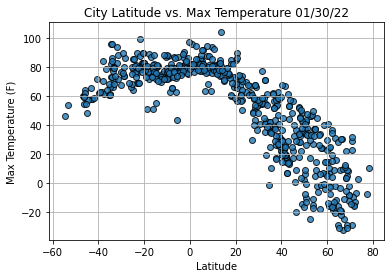

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

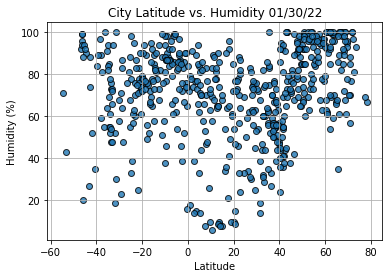

In [14]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

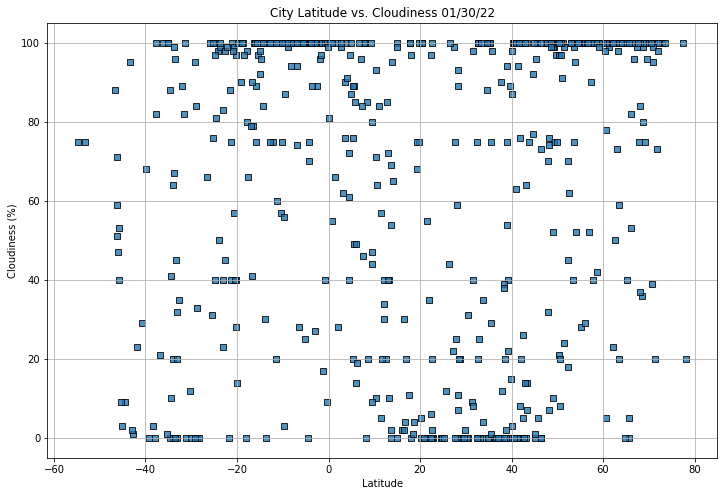

In [15]:
plt.subplots(figsize=(12,8))
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="s",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

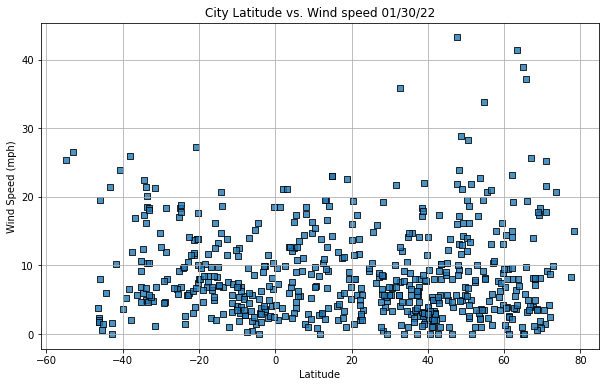

In [16]:
plt.subplots(figsize=(10,6))
plt.scatter(lats, wind_speed, 
            edgecolor="black", linewidths=1, marker="s",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()